# Minimal Bi-stable MAK System

#### Author(s):  Sean Sirur
#### Reference: [BMC Systems Biology](https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-3-90) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/bm233-2.cpi)

This is a model of an artificially minimal system required to generate a bistable mass-action-kinetic reaction.

The system modelled in question is thus:

S + Y -> 2X

2X -> X + Y

X + Y -> Y + P

X -> P

Resulting in the following ODEs:

$ \frac{\mathit{d}[X]}{\mathit{d}t} = 2*k1*[Y]-k2*[X]*[X]-k3*[Y]*[X]-k4*[X] $

$ \frac{\mathit{d}[Y]}{\mathit{d}t} = - k1 * [Y] + 2 * k2 * [X] * [X]$

$ \frac{\mathit{d}[P]}{\mathit{d}t} = k3 * [Y] * [X] + k3 * [X]$
 
where square brackets indicate the concentration of the species.

 
This is the smallest theoretical mass-action-kinetic system by the following definition:

 
1. It has the minimal number of reactants.

2. It has the minimal number of reactions.

3. It has the minimal number of ODEs resulting from these reactions.

 
The third requirement was prioritised over the second requirement. The system has all the features necessary to form a bistable system i.e. the input signal which triggers the reaction (modelled here as a tau transition from Y into two X, rather than including an unnecessary S species) and the positive feedback loop (seen in the fact that a Y and another X are produced when two X species react).

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import singleSimulate

In [3]:
cpi_model = singleSimulate.Simulate('bm233-2')

Select the model: bm233-2
The processes in this cpi model are:
Pi


## Code

In [4]:
ode_def = cpi_model.view_processdef('Pi')

The cpi definitions of selected file are:

-- cPi model of BIOMD0000000233



-- S + Y -> 2X

-- 2X -> X + Y

-- X + Y -> Y + P

-- X -> P.



-- S + Y -> 2X  

-- represented as a tau transition "Y -> 2X" as S is a controlled quantity 

-- which is abstracted away in the final ODE as part of k1.



-- X + Y -> Y + P 

-- represented as a reaction transition between X and Y 

-- via names x and y respectively at rate k3.



species Y(y,x,m,n) = tau<11>.(X(x,y,m,n)|X(x,y,m,n)) + y.P();



-- 2X -> X + Y

-- represented as X being able to react on two names m and n 

-- with both names being held by X itself.



-- X + Y -> Y + P

-- See above.



-- X -> P

-- represented as a tau transition from from X to P.



species X(x,y,m,n) = m.Y(y,x,m,n) +  n.X(x,y,m,n) + x.Y(y,x,m,n) + tau<14>.P();



species P() = tau<0>.P();



process Pi = [10] Y(y,x,m,n) || [0] X(x,y,m,n) || [0] P() : {

  x-y@13,

  m-n@12

};

    







## Plot

Time Start: 0.0, Time End: 2.0, Number of Times: 200.


<IPython.core.display.Javascript object>


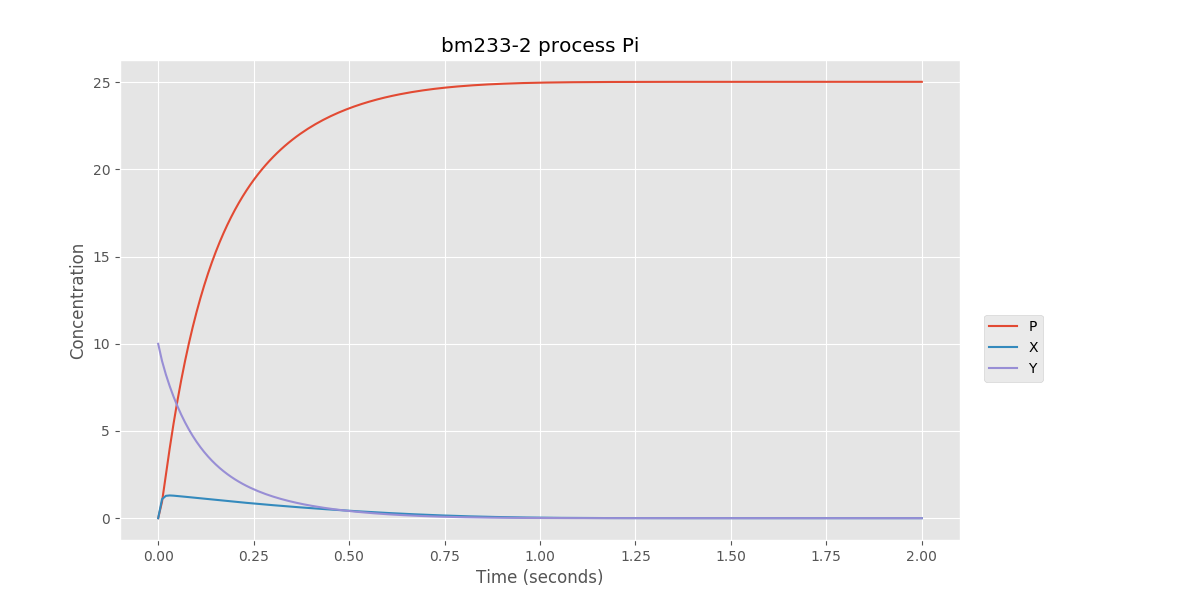

In [5]:
solution = cpi_model.simulate_process('Pi','odeint', 0, 2, 200)
solution.show_plot()